# HW3 - CS503 - W24
## Department of Computer Science
1. MABLINE ANDREA

#### Load libraies

In [67]:
pip install spectral

Note: you may need to restart the kernel to use updated packages.


In [68]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from spectral import imshow, view_cube
from matplotlib import patches
from spectral import spy_colors
from spectral import imshow as spyShow
import tqdm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### The names of the classes available in the HS image

In [69]:
class_names = ['Unknown', 'Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']

#### 1. Load Hyperspectral image

In [70]:
X = scipy.io.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

In [71]:
# shape of image 145x145x220
X.shape

(145, 145, 200)

#### 2. False color image uisng bands 30 as Red, 20 and Green and 10 as Blue

ImageView object:
  Display bands       :  (30, 20, 10)
  Interpolation       :  nearest
  RGB data limits     :
    R: [2272.0, 6366.0]
    G: [2560.0, 7271.0]
    B: [2700.0, 7990.0]

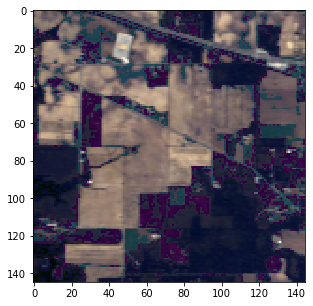

In [72]:
imshow(X, (30, 20, 10), figsize=(5, 5), interpolation='nearest')

#### 3. Load reference image (ground truth)

ImageView object:
  Interpolation       :  <default>

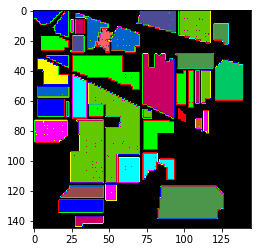

In [73]:
gt = scipy.io.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
imshow(classes=gt)

In [74]:
# display class labels
np.unique(gt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

#### 4. Class distribution 

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np


In [76]:
# code here
gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']


In [77]:
class_names = {
    0: 'Unknown',
    1: 'Alfalfa',
    2: 'Corn-notill',
    3: 'Corn-mintill',
    4: 'Corn',
    5: 'Grass-pasture',
    6: 'Grass-trees',
    7: 'Grass-pasture-mowed',
    8: 'Hay-windrowed',
    9: 'Oats',
    10: 'Soybean-notill',
    11: 'Soybean-mintill',
    12: 'Soybean-clean',
    13: 'Wheat',
    14: 'Woods',
    15: 'Buildings-Grass-Trees-Drives',
    16: 'Stone-Steel-Towers'
}

In [78]:
unique_classes, class_counts = np.unique(gt_data, return_counts=True)
class_counts = class_counts[1:]
unique_classes = unique_classes[1:]


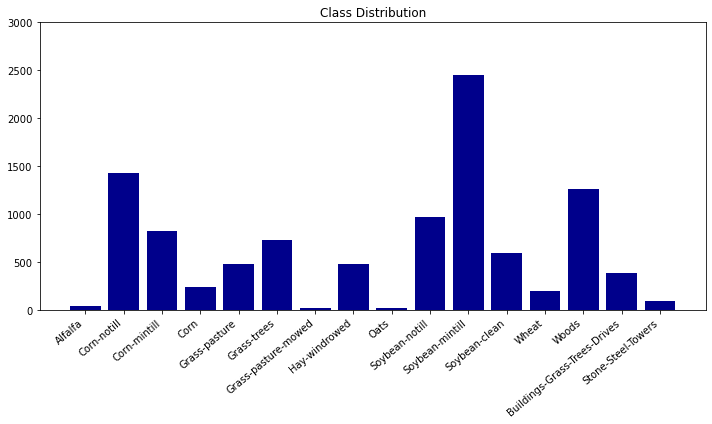

In [80]:
plt.figure(figsize=(10, 6))
plt.bar([class_names[c] for c in unique_classes], class_counts, color = '#00008B')
plt.title('Class Distribution')
plt.xticks(rotation=40, ha='right')
plt.ylim([0,3000]) 
plt.tight_layout()
plt.show()

### 5. Overlaying the ground truth mask on the image

In [85]:
import spectral

ImageView object:
  Display bands       :  [0, 100.0, 199]
  Interpolation       :  <default>
  RGB data limits     :
    R: [2560.0, 4536.0]
    G: [1169.0, 2511.0]
    B: [981.0, 1036.0]

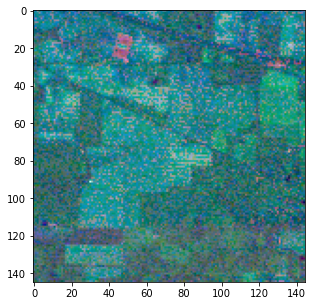

In [86]:
# your code
# use imshow. check options for overlay, or use your own solution
hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

spectral.imshow(hs_image, figsize=(5, 5))

In [87]:
gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']

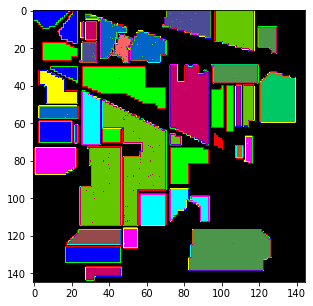

In [90]:
spectral.imshow(classes=gt_data, figsize=(5, 5))
plt.show()

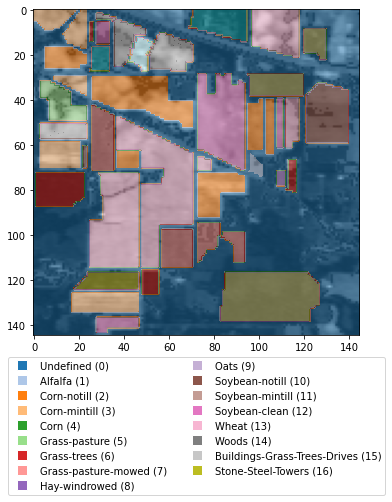

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import spectral


hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']


class_names = {
    0: 'Undefined',
    1: 'Alfalfa',
    2: 'Corn-notill',
    3: 'Corn-mintill',
    4: 'Corn',
    5: 'Grass-pasture',
    6: 'Grass-trees',
    7: 'Grass-pasture-mowed',
    8: 'Hay-windrowed',
    9: 'Oats',
    10: 'Soybean-notill',
    11: 'Soybean-mintill',
    12: 'Soybean-clean',
    13: 'Wheat',
    14: 'Woods',
    15: 'Buildings-Grass-Trees-Drives',
    16: 'Stone-Steel-Towers'
}


plt.figure(figsize=(8, 6))
plt.imshow(hs_image[:, :, 30], cmap ='gray') 

plt.imshow(gt_data, cmap='tab20', alpha=0.5)


unique_classes = np.unique(gt_data)
legend_labels = [f"{class_names[c]} ({c})" for c in unique_classes]
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=plt.cm.tab20(i), markersize=10, label=legend_labels[i]) for i in range(len(unique_classes))]
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.axis('on') 

plt.show()


#### 6.	Select 1% of samples from each class and plot their mean vectors. These mean vectors represent the mean spectral signatures of the classes.

In [94]:
# 1. Create a Python dcitionary for the class names 
# - key: class number
# - value: class name
class_names_a = np.array(class_names)
labels_dict = dict(zip(np.unique(gt), class_names))
unique, counts = np.unique(gt, return_counts=True)
labels_distribution = dict(zip(unique, counts))
labels_distribution

{0: 10776,
 1: 46,
 2: 1428,
 3: 830,
 4: 237,
 5: 483,
 6: 730,
 7: 28,
 8: 478,
 9: 20,
 10: 972,
 11: 2455,
 12: 593,
 13: 205,
 14: 1265,
 15: 386,
 16: 93}

In [95]:
# Remove the background class (# 0)
labels_distribution.pop(0)
labels_distribution

{1: 46,
 2: 1428,
 3: 830,
 4: 237,
 5: 483,
 6: 730,
 7: 28,
 8: 478,
 9: 20,
 10: 972,
 11: 2455,
 12: 593,
 13: 205,
 14: 1265,
 15: 386,
 16: 93}

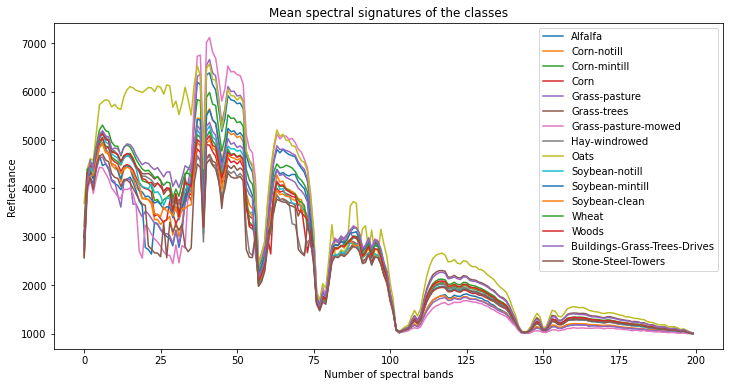

In [97]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']


hs_flat = hs_image.reshape(-1, hs_image.shape[2])


class_names = {
    0: 'Undefined',
    1: 'Alfalfa',
    2: 'Corn-notill',
    3: 'Corn-mintill',
    4: 'Corn',
    5: 'Grass-pasture',
    6: 'Grass-trees',
    7: 'Grass-pasture-mowed',
    8: 'Hay-windrowed',
    9: 'Oats',
    10: 'Soybean-notill',
    11: 'Soybean-mintill',
    12: 'Soybean-clean',
    13: 'Wheat',
    14: 'Woods',
    15: 'Buildings-Grass-Trees-Drives',
    16: 'Stone-Steel-Towers'
}


classes = np.unique(gt_data)
classes = classes[classes != 0]


mean_vectors = []


for class_label in classes:
    
    class_indices = np.where(gt_data == class_label)

    
    num_pixels = len(class_indices[0])
    num_samples = max(1, int(0.01 * num_pixels))  
    random_indices = np.random.choice(num_pixels, num_samples, replace=False)

    
    selected_pixels = hs_flat[class_indices[0][random_indices], :]

    
    mean_vector = np.mean(selected_pixels, axis=0)
    mean_vectors.append(mean_vector)


mean_vectors = np.array(mean_vectors)


plt.figure(figsize=(12, 6))
for i in range(len(classes)):
    class_name = class_names.get(classes[i], f'Class {classes[i]}')
    plt.plot(mean_vectors[i], label=class_name)
plt.xlabel('Number of spectral bands')
plt.ylabel('Reflectance')
plt.title('Mean spectral signatures of the classes')
plt.legend()
plt.show()


#### 7.1. Apply PCA on the data cube and display the data scatter using the first two components

In [98]:
# your code here


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.io as sio


hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']


hs_flat = hs_image.reshape(-1, hs_image.shape[2])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(hs_flat)



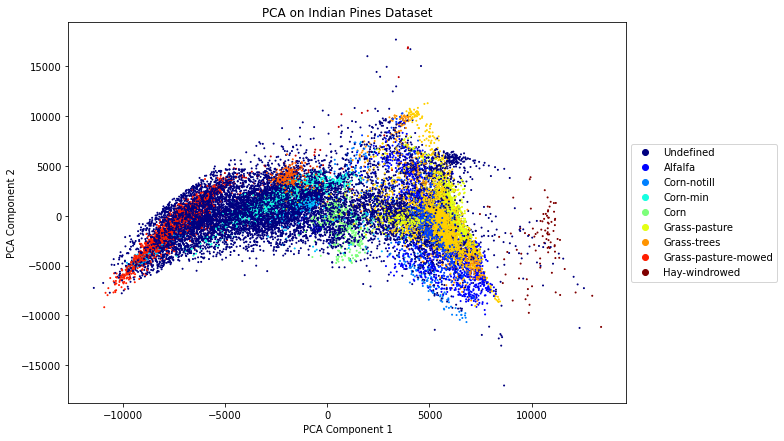

In [100]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gt_data.flatten(), cmap='jet', s=1)


class_names = ['Undefined', 'Alfalfa', 'Corn-notill', 'Corn-min', 'Corn',
               'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 'Hay-windrowed',
               'Oats', 'Soybean-notill', 'Soybean-mintill', 'Soybean-clean', 'Wheat',
               'Woods', 'Buildings-Grass-Trees-Drives', 'Stone-Steel-Towers']
plt.legend(handles=scatter.legend_elements()[0], labels=class_names, loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('PCA on Indian Pines Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


#### 7.2. Apply t-SNE on the data cube and display the data scatter using the first two components

In [101]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import scipy.io as sio


hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']


hs_flat = hs_image.reshape(-1, hs_image.shape[2])


In [102]:
#Performing T-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_result = tsne.fit_transform(hs_flat)




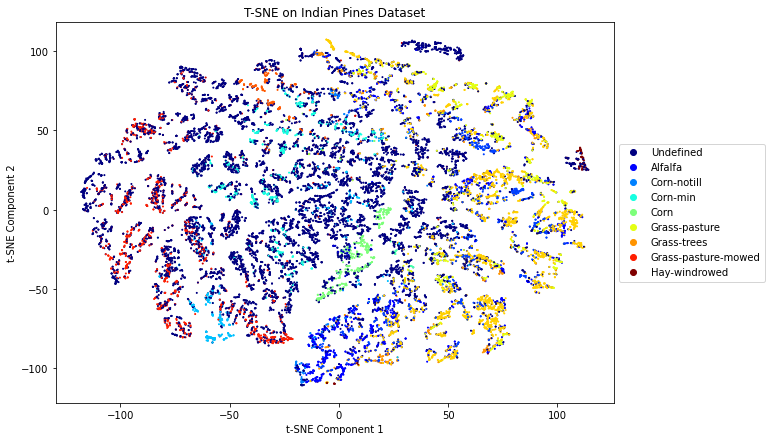

In [103]:
class_names = ['Undefined', 'Alfalfa', 'Corn-notill', 'Corn-min', 'Corn',
               'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 'Hay-windrowed',
               'Oats', 'Soybean-notill', 'Soybean-mintill', 'Soybean-clean', 'Wheat',
               'Woods', 'Buildings-Grass-Trees-Drives', 'Stone-Steel-Towers']


plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=gt_data.flatten(), cmap='jet', s=1)


plt.legend(handles=scatter.legend_elements()[0], labels=class_names, loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('T-SNE on Indian Pines Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


#### 8.1.	Reconstruct the image using the first important component of PCA.

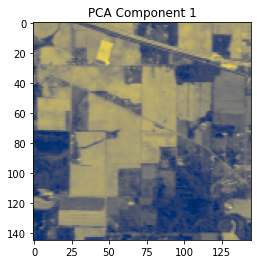

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.io as sio


gt_data = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']


hs_flat = hs_image.reshape(-1, hs_image.shape[2])

pca = PCA(n_components=1)
pca_result = pca.fit_transform(hs_flat)


pca_image = pca_result.reshape(hs_image.shape[0], hs_image.shape[1])

plt.figure(figsize=(6, 4))
plt.imshow(pca_image, cmap='cividis')
plt.title('PCA Component 1')
plt.axis('on')
plt.show()


#### 8.2. Reconstruct the image using the first important component of t-SNE.

In [111]:
# your code

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import scipy.io as sio


In [113]:
hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

In [114]:
hs_flat = hs_image.reshape(-1, hs_image.shape[2])

In [115]:
#Performing T-SNE
tsne = TSNE(n_components=1,perplexity=10)
tsne_result = tsne.fit_transform(hs_flat)

In [116]:
first_component = tsne_result[:, 0]

In [35]:
first_component_image = first_component.reshape(hs_image.shape[0], hs_image.shape[1])

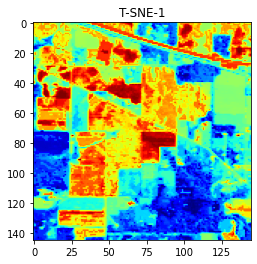

In [36]:
plt.figure(figsize=(6, 4))
plt.imshow(first_component_image, cmap='jet')
plt.title('T-SNE-1')
plt.axis('on')
plt.show()


Reconstructing the image using the second important component of t-SNE

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import scipy.io as sio


In [39]:
hs_image = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

In [40]:
hs_flat = hs_image.reshape(-1, hs_image.shape[2])

In [41]:
#Performing T-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, learning_rate=200)
tsne_result = tsne.fit_transform(hs_flat)

In [42]:
second_component = tsne_result[:, 1]


In [43]:
second_component_image = second_component.reshape(hs_image.shape[0], hs_image.shape[1])

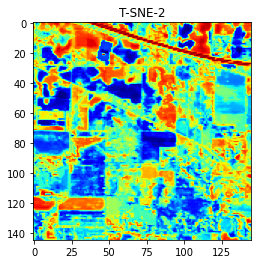

In [44]:
plt.figure(figsize=(6, 4))
plt.imshow(second_component_image, cmap='jet')
plt.title('T-SNE-2')
plt.axis('on')
plt.show()
